<a href="https://colab.research.google.com/github/Nyan-dwaro/comparing-diffent-Ml-algorithms-for-breast-cancer-detection/blob/main/kemriCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score)
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)
#pd.set_option("display.max_rows",None)
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,0.3350,2.0430,2.132,20.05,0.011130,0.014630,0.005308,0.005250,0.01801,0.005667,10.92,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
494,914102,B,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429,NaN
188,874662,B,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,0.1859,1.9260,1.011,14.47,0.007831,0.008776,0.015560,0.006240,0.03139,0.001988,12.57,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576,NaN
387,902976,B,13.880,16.16,88.37,596.6,0.07026,0.04831,0.020450,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.014150,0.019880,0.007016,0.01647,0.001970,15.51,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,NaN
184,873885,M,15.280,22.41,98.92,710.6,0.09057,0.10520,0.053750,0.032630,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.017740,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772,NaN


In [ ]:
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [ ]:
df.sort_values("id",inplace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
131,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.0940,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,NaN
287,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,0.1532,0.4690,1.1150,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,NaN
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,0.2877,0.9480,2.1710,24.87,0.005332,0.02115,0.01536,0.011870,0.01522,0.002815,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472,NaN
403,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834,NaN
47,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,0.2871,0.8937,1.8970,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.diagnosis.replace({"M": 1, "B": 0}, inplace = True)
df.diagnosis.unique()

array([1, 0])

In [ ]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df[(df.radius_mean>15.00) & (df.diagnosis == 0)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
128,866458,0,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,0.4309,1.0680,2.796,39.84,0.009006,0.041850,0.03204,0.022580,0.023530,0.004984,16.11,18.33,105.9,762.6,0.13860,0.28830,0.1960,0.14230,0.2590,0.07779,NaN
133,867387,0,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.015150,0.01678,0.012680,0.016690,0.002330,17.50,19.25,114.3,922.8,0.12230,0.19490,0.1709,0.13740,0.2723,0.07071,NaN
375,901303,0,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,0.1745,0.4890,1.349,14.91,0.004510,0.018120,0.01951,0.011960,0.019340,0.003696,16.97,19.14,113.1,861.5,0.12350,0.25500,0.2114,0.12510,0.3153,0.08960,NaN
406,905189,0,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.012460,0.01831,0.008747,0.015000,0.001621,17.71,19.58,115.9,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012,NaN
484,912600,0,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,0.1630,0.3871,1.143,13.87,0.006034,0.018200,0.03336,0.010670,0.011750,0.002256,17.01,14.20,112.5,854.3,0.15410,0.29790,0.4004,0.14520,0.2557,0.08181,NaN
500,914862,0,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,0.3720,0.8423,2.304,34.84,0.004123,0.018190,0.01996,0.010040,0.010550,0.003237,16.76,20.43,109.7,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549,NaN
508,915452,0,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,0.2067,0.4706,1.146,20.67,0.007394,0.012030,0.02470,0.014310,0.013440,0.002569,17.32,17.76,109.8,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230,NaN
157,8711216,0,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,0.4789,2.0600,3.479,46.61,0.003443,0.026610,0.03056,0.011100,0.015200,0.001519,18.22,28.07,120.3,1032.0,0.08774,0.17100,0.1882,0.08436,0.2527,0.05972,NaN
209,8810436,0,15.27,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,0.2134,0.3628,1.525,20.00,0.004291,0.012360,0.01841,0.007373,0.009539,0.001656,17.38,15.92,113.7,932.7,0.12220,0.21860,0.2962,0.10350,0.2320,0.07474,NaN
363,9010872,0,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.58,0.007257,0.018050,0.01832,0.010330,0.016940,0.002001,18.13,25.45,117.2,1009.0,0.13380,0.16790,0.1663,0.09123,0.2394,0.06469,NaN


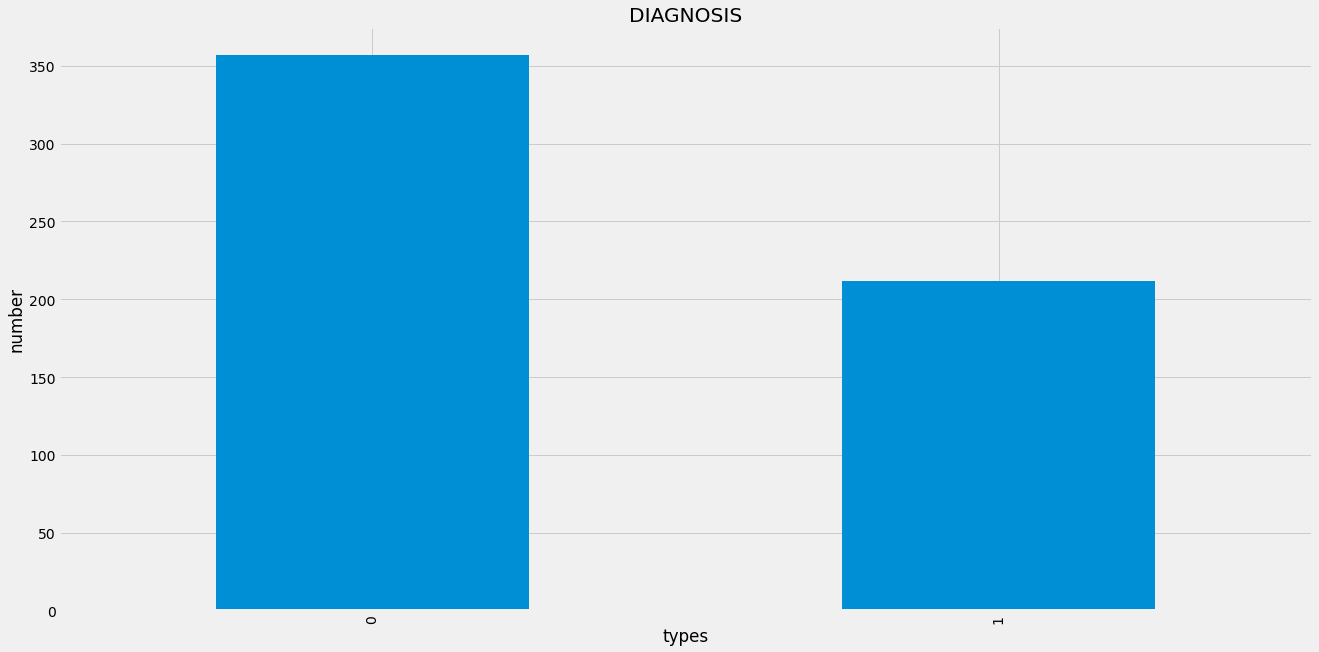

In [ ]:
plt.figure(figsize = (20,10))
df.diagnosis.value_counts().plot(kind='bar')
plt.title("DIAGNOSIS")
plt.xlabel("types")
plt.ylabel("number")
plt.show()

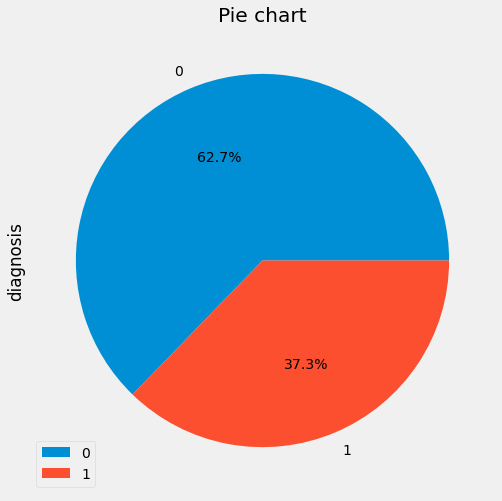

In [ ]:
plt.figure(figsize = (8,8))
df.diagnosis.value_counts().plot(kind = 'pie', autopct = "%0.1f%%")
plt.legend()
plt.title("Pie chart")
plt.show()

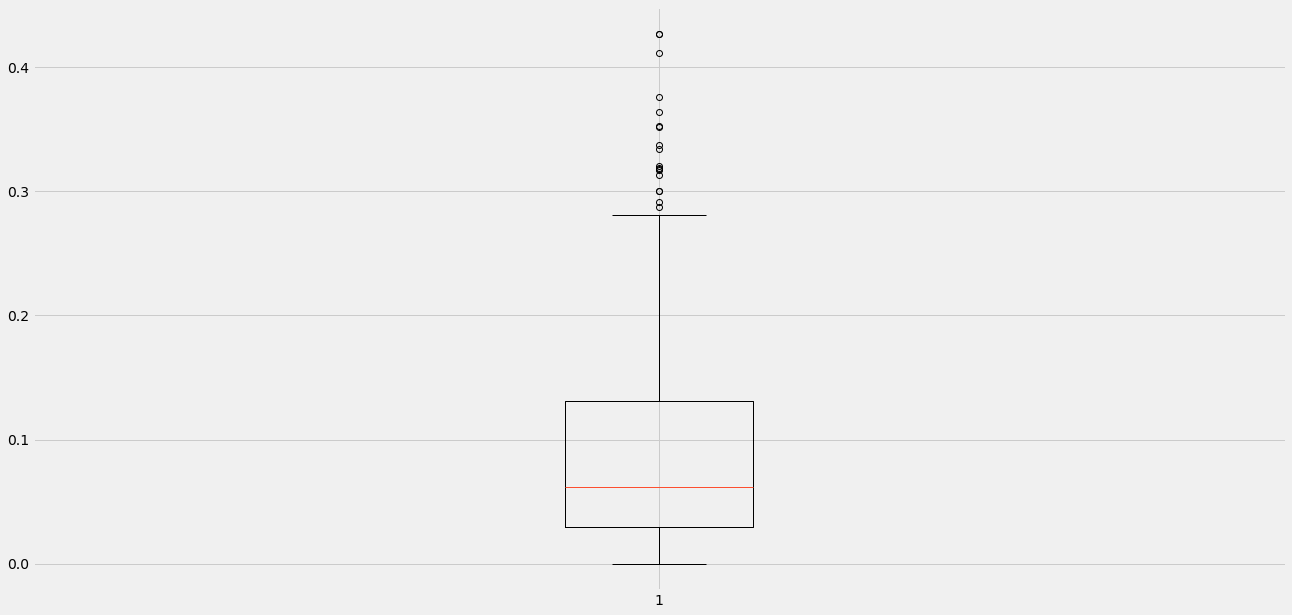

In [ ]:
plt.figure(figsize =  (20,10))
plt.boxplot(df.	concavity_mean)
plt.show()

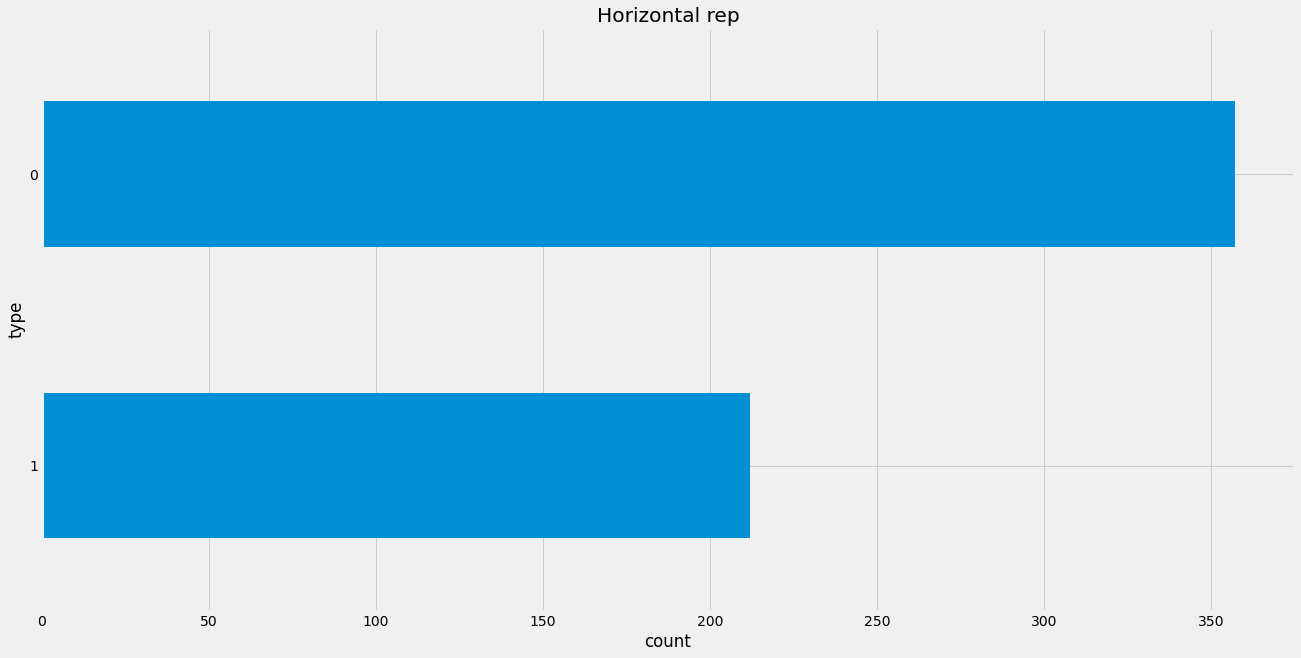

In [ ]:
plt.figure(figsize = (20,10))
df.diagnosis.value_counts().sort_values().plot(kind=("barh"))
plt.title("Horizontal rep")
plt.ylabel("type")
plt.xlabel("count")
plt.show()

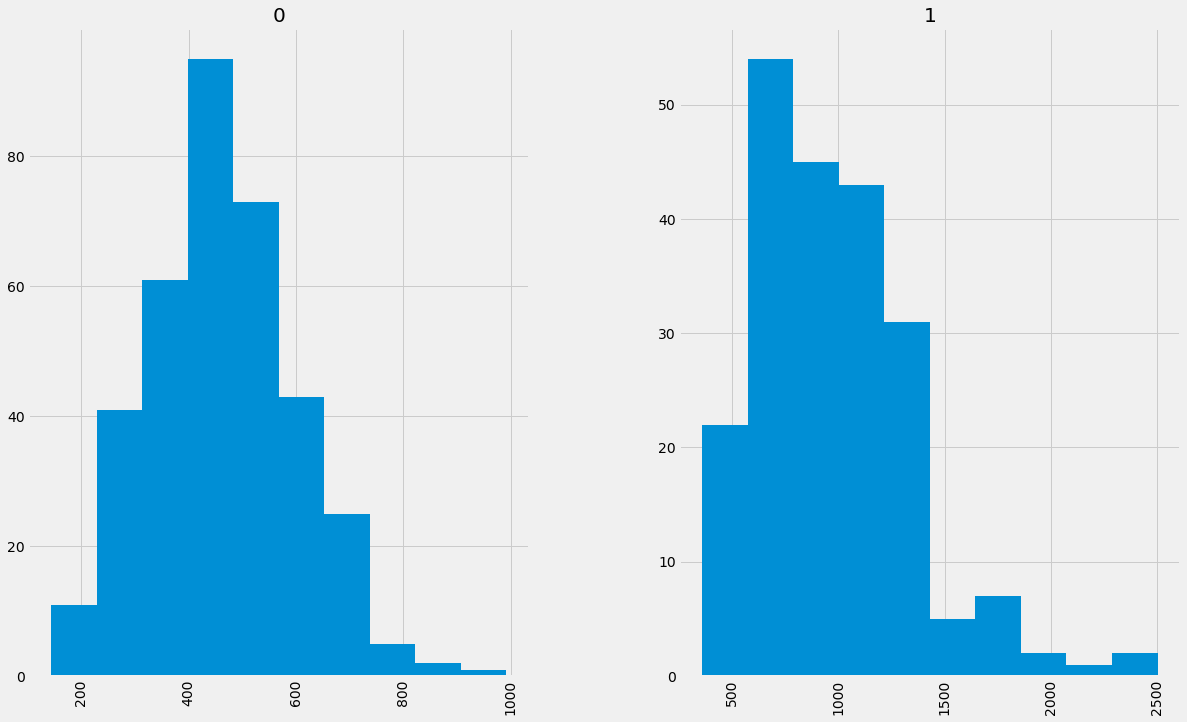

In [ ]:
df.hist('area_mean', by='diagnosis', figsize=(20,12))
plt.show()

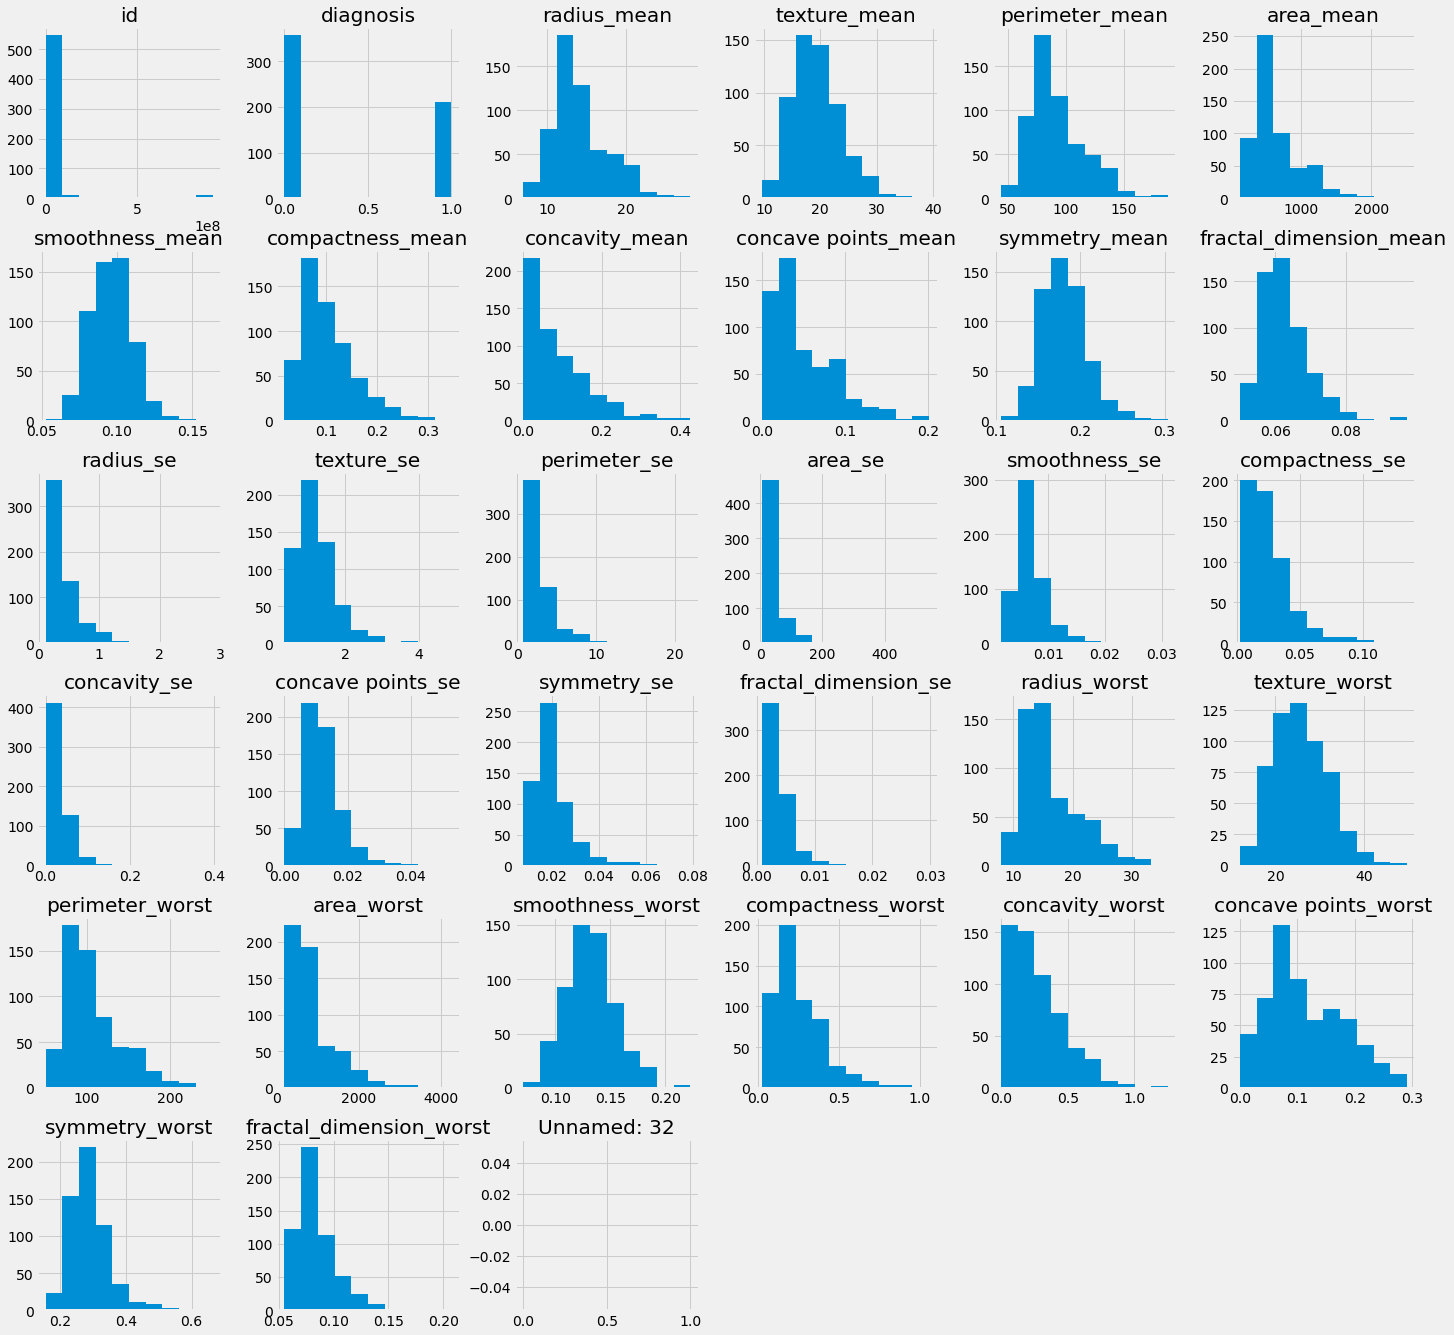

In [ ]:
df.hist(figsize= (22,22))
plt.show()

In [ ]:
df.drop(columns=['Unnamed: 32', 'id'],inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X = df.drop(columns=['diagnosis'])
y= df.diagnosis

In [ ]:
#X = StandardScaler().fit_transform(X)
#X[:3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


In [ ]:
DecisionTreeClassifier,
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

In [ ]:
#dt.fit(X_train,y_train)
#dt_pred = dt.predict(X_test)
#acc = accuracy_score(y_test, dt_pred)
#print(np.max(acc))

In [ ]:
#dt = DecisionTreeClassifier(random_state = 1)   #We are building our model
dt.fit(X_train,y_train)       #We are training our model
print("Print accuracy of Decision Tree Classifier algo: ",dt.score(X_test,y_test))
dt_acc_score = dt.score(X_test,y_test)

Print accuracy of Decision Tree Classifier algo:  0.9298245614035088


In [ ]:
#rf.fit(X_train,y_train)
#rf_pred = rf.predict(X_test)
#acc = accuracy_score(y_test, rf_pred)
#print(np.max(acc))

In [ ]:
#rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)
print("Print accuracy of Random Forest Classifier algo: ",rf.score(X_test,y_test))
rf_acc_score = rf.score(X_test,y_test)

Print accuracy of Random Forest Classifier algo:  0.9473684210526315


In [ ]:

svm.fit(X_train,y_train)      #We are training our model
print("Print accuracy of svm algo: ",svm.score(X_test,y_test))
svm_acc_score = svm.score(X_test,y_test)

Print accuracy of svm algo:  0.9064327485380117


In [ ]:
cm = confusion_matrix(y_test, dt.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('The accuracy score of the test data of Decision Tre=',(TP + TN)/(TP + TN + FN + FP))

[[96  7]
 [ 5 63]]
The accuracy score of the test data of Decision Tre= 0.9298245614035088


In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('The accuracy score of the test data of Random Forest=',(TP + TN)/(TP + TN + FN + FP))

[[100   3]
 [  6  62]]
The accuracy score of the test data of Random Forest= 0.9473684210526315


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, rf.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       103
           1       0.95      0.91      0.93        68

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

0.9473684210526315


In [ ]:
pred = rf.predict(X_test)
print(pred)
print()
print(y_test)

[0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0]

289    0
425    0
379    1
101    0
512    1
      ..
291    0
342    0
24     1
20     0
456    0
Name: diagnosis, Length: 171, dtype: int64


In [ ]:
model_ev = pd.DataFrame({'Model': ['Decision Tree','Random Forest','svm'], 
                         'Accuracy': [dt_acc_score*100,rf_acc_score*100,svm_acc_score*100]})
model_ev

,Model,Accuracy
0,Decision Tree,92.982456
1,Random Forest,94.736842
2,svm,90.643275


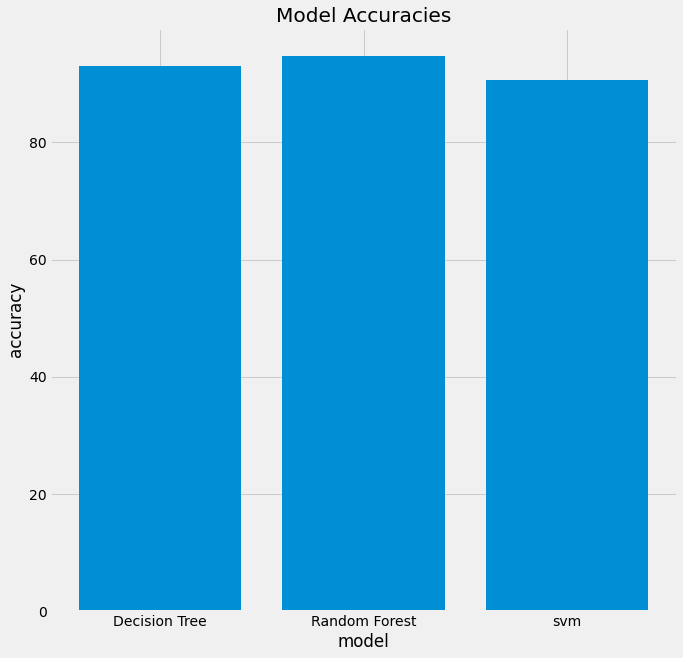

In [ ]:
x = model_ev['Model']
y= model_ev['Accuracy']
plt.figure (figsize=(10,10))
plt.title('Model Accuracies')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.bar(x,y)
plt.show()

In [ ]:
input_data = (12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,0.2113,0.5996,1.438,15.82,0.005343,0.005767,0.01123,0.005051,0.01977,0.0009502,12.85,16.47,81.6,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = rf.predict(input_data_reshape)
print(prediction)
if (prediction[0]==0): 
  print("The tumor is a benign")
else:
  print("The tumor is malignant")

[0]
The tumor is a benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
